# Übung 3

## 2. Gausches Eliminationsverfahren

In [19]:
import numpy as np

# 1.
# Koeffizientenmatrix
A = np.array([[2, -5, 8],
              [-2, -7, 1],
              [4, 2, 7]])

b = np.array([0, 0, 0])

# Erweiterte Koeffizientenmatrix (A|b)
A_augmented = np.column_stack((A, b))

# Rang der Koeffizientenmatrix A
rank_A = np.linalg.matrix_rank(A)

# Rang der erweiterten Koeffizientenmatrix (A|b)
rank_A_augmented = np.linalg.matrix_rank(A_augmented)

# Ausgabe der Ränge
print("Rang der Koeffizientenmatrix A:", rank_A)
print("Rang der erweiterten Koeffizientenmatrix (A|b):", rank_A_augmented)

# 2.
# Berechnung des Nullraums
U, S, Vh = np.linalg.svd(A)
null_space_vector = Vh[-1, :]

# Skalierung des Vektors, um ganzzahlige Werte zu erhalten
scaling_factor = null_space_vector[0] / -17
exact_solution = null_space_vector / scaling_factor

print("Nullraum der Matrix A:")
print(null_space_vector)
print("\nExakte Lösung (skaliert):")
print(exact_solution)

Rang der Koeffizientenmatrix A: 2
Rang der erweiterten Koeffizientenmatrix (A|b): 2
Nullraum der Matrix A:
[ 0.86193422 -0.30421208 -0.4056161 ]

Exakte Lösung (skaliert):
[-17.   6.   8.]


## GEV und Python

In [21]:
import numpy as np

def solve_system(A, b):
    # Rang der Koeffizientenmatrix A
    rank_A = np.linalg.matrix_rank(A)
    
    # Rang der erweiterten Koeffizientenmatrix (A|b)
    A_augmented = np.column_stack((A, b))
    rank_augmented = np.linalg.matrix_rank(A_augmented)
    
    # Überprüfung der Lösungsstruktur
    if rank_A == rank_augmented:
        if rank_A == A.shape[1]:  # Eindeutige Lösung
            solution = np.linalg.solve(A, b)
            print("Eindeutige Lösung:", solution)
        else:  # Unendlich viele Lösungen
            print("Unendlich viele Lösungen.")
            # Berechnung der allgemeinen Lösung (Vielfache)
            null_space = null_space_basis(A)
            print("Allgemeine Lösung (Vielfache):")
            print("x =", null_space, "· t")
    else:
        print("Keine Lösung. Das System ist inkonsistent.")

def null_space_basis(A):
    # Berechnung des Nullraums mit SVD
    U, S, Vh = np.linalg.svd(A)
    # Der Nullraum ist der letzte Spaltenvektor von Vh, wenn der entsprechende Singulärwert null ist
    null_space_vector = Vh[-1, :]
    return null_space_vector

# Beispiel A
A_A = np.array([
    [1, 1, 1],
    [1, 2, 2],
    [1, 2, 3]
])
b_A = np.array([1, 1, 1])

print("Beispiel A:")
solve_system(A_A, b_A)

# Beispiel B
A_B = np.array([
    [-1, 3, -2],
    [-1, 4, -3],
    [-1, 5, -4]
])
b_B = np.array([1, 0, 0])

print("\nBeispiel B:")
solve_system(A_B, b_B)

# Beispiel C
A_C = np.array([
    [-1, 3, -2],
    [-1, 4, -3],
    [-1, 5, -4]
])
b_C = np.array([4, 5, 6])

print("\nBeispiel C:")
solve_system(A_C, b_C)

Beispiel A:
Eindeutige Lösung: [1. 0. 0.]

Beispiel B:
Keine Lösung. Das System ist inkonsistent.

Beispiel C:
Unendlich viele Lösungen.
Allgemeine Lösung (Vielfache):
x = [0.57735027 0.57735027 0.57735027] · t


## 4. Existenz und Eindeutigkeit

In [22]:
import numpy as np

# Koeffizientenmatrix A
A = np.array([
    [2, -4, -2],
    [-5, 1, 1],
    [7, -5, -3]
])

# Rang der Koeffizientenmatrix A
rank_A = np.linalg.matrix_rank(A)

# Anzahl der Variablen
num_variables = A.shape[1]

# Überprüfung, ob der Rang von A gleich der Anzahl der Variablen ist
if rank_A == num_variables:
    print("Das System hat für alle Vektoren b eine eindeutige Lösung.")
else:
    print("Das System hat nicht für alle Vektoren b eine eindeutige Lösung.")


Das System hat nicht für alle Vektoren b eine eindeutige Lösung.


Der Rang der Koeffizientenmatrix A ist 2, während die Anzahl der Variablen 3 ist. Daher hat das lineare Gleichungssystem nicht für alle Vektoren b eine eindeutige Lösung.

## 5. Parabel durch 3 Punkte

Koeffizienten der Parabel:
a = -3.0, b = 5.5, c = -1.5


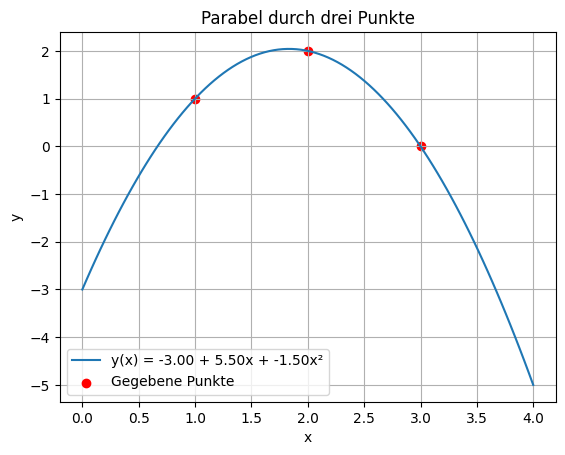

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Koeffizientenmatrix A
A = np.array([
    [1, 1, 1],
    [1, 2, 4],
    [1, 3, 9]
])

# Rechte Seite des Gleichungssystems (b)
b = np.array([1, 2, 0])

# Lösen des LGS
coefficients = np.linalg.solve(A, b)
a, b, c = coefficients

print("Koeffizienten der Parabel:")
print(f"a = {a}, b = {b}, c = {c}")

# Grafische Darstellung der Parabel
x_values = np.linspace(0, 4, 100)
y_values = a + b * x_values + c * x_values**2

plt.plot(x_values, y_values, label=f"y(x) = {a:.2f} + {b:.2f}x + {c:.2f}x²")
plt.scatter([1, 2, 3], [1, 2, 0], color='red', label='Gegebene Punkte')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parabel durch drei Punkte')
plt.legend()
plt.grid()
plt.show()